In [1]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [2]:
# define x and y
x = data.drop(['labels'], axis = 1)
y = data.loc[:, 'labels']
x.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [3]:
pd.value_counts(y)

C:\Users\WindW\AppData\Local\Temp\ipykernel_28748\3605348509.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y)


labels
2    1156
1     954
0     890
Name: count, dtype: int64

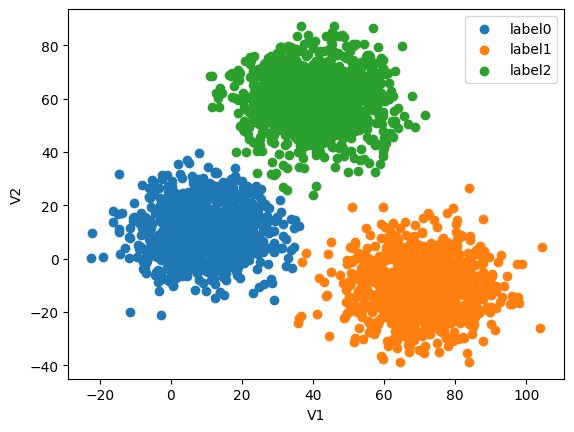

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt

mask0 = y == 0
mask1 = y == 1
mask2 = y == 2

fig1 = plt.figure()
label0 = plt.scatter(x.loc[:, 'V1'][mask0], x.loc[:, 'V2'][mask0])
label1 = plt.scatter(x.loc[:, 'V1'][mask1], x.loc[:, 'V2'][mask1])
label2 = plt.scatter(x.loc[:, 'V1'][mask2], x.loc[:, 'V2'][mask2])
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2), ('label0', 'label1', 'label2'))
plt.show()

In [5]:
# set the model
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3, random_state=0)
KM.fit(x)

C:\Users\WindW\anaconda3\envs\ai_basic\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\WindW\anaconda3\envs\ai_basic\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(n_clusters=3, random_state=0)

In [6]:
centers = KM.cluster_centers_

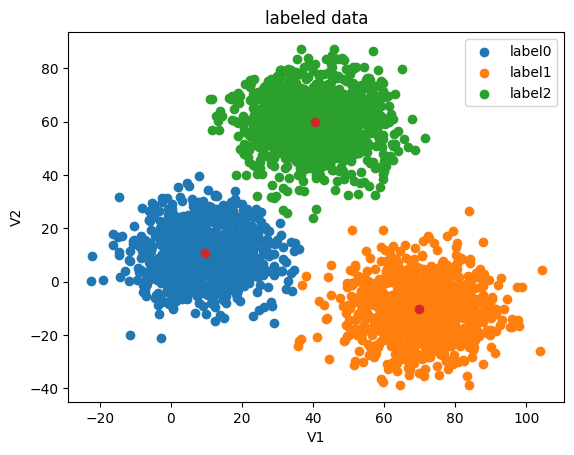

In [7]:
mask0 = y == 0
mask1 = y == 1
mask2 = y == 2
fig2 = plt.figure()
plt.title("labeled data")
label0 = plt.scatter(x.loc[:, 'V1'][mask0], x.loc[:, 'V2'][mask0])
label1 = plt.scatter(x.loc[:, 'V1'][mask1], x.loc[:, 'V2'][mask1])
label2 = plt.scatter(x.loc[:, 'V1'][mask2], x.loc[:, 'V2'][mask2])
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

In [8]:
# predict: test data: V1=80, V2=60
y_predict_test = KM.predict([[80, 60]])
print(y_predict_test)

[0]


C:\Users\WindW\anaconda3\envs\ai_basic\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [9]:
# predict based on training data
y_predict = KM.predict(x)
print(pd.value_counts(y_predict), pd.value_counts(y))

0    1149
1     952
2     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


C:\Users\WindW\AppData\Local\Temp\ipykernel_28748\2235192269.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_predict), pd.value_counts(y))


In [10]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.31966666666666665


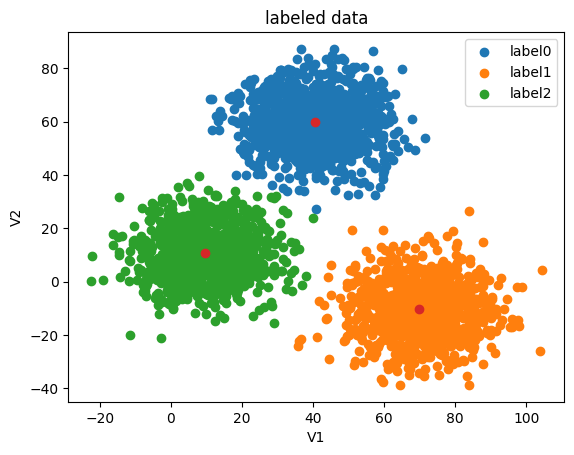

In [11]:
# visualize data and result

mask0 = y_predict == 0
mask1 = y_predict == 1
mask2 = y_predict == 2

fig4 = plt.figure()
plt.title("labeled data")
label0 = plt.scatter(x.loc[:, 'V1'][mask0], x.loc[:, 'V2'][mask0])
label1 = plt.scatter(x.loc[:, 'V1'][mask1], x.loc[:, 'V2'][mask1])
label2 = plt.scatter(x.loc[:, 'V1'][mask2], x.loc[:, 'V2'][mask2])
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()


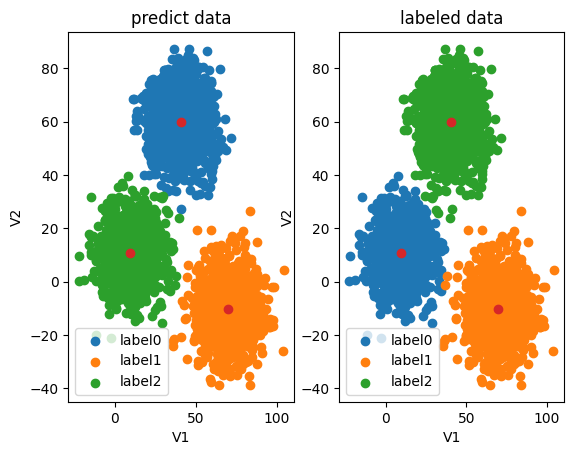

In [12]:
# visualize data and result

mask0 = y_predict == 0
mask1 = y_predict == 1
mask2 = y_predict == 2

fig5 = plt.subplot(121)
plt.title("predict data")
label0 = plt.scatter(x.loc[:, 'V1'][mask0], x.loc[:, 'V2'][mask0])
label1 = plt.scatter(x.loc[:, 'V1'][mask1], x.loc[:, 'V2'][mask1])
label2 = plt.scatter(x.loc[:, 'V1'][mask2], x.loc[:, 'V2'][mask2])
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])

mask0 = y == 0
mask1 = y == 1
mask2 = y == 2
fig6 = plt.subplot(122)
plt.title("labeled data")
label0 = plt.scatter(x.loc[:, 'V1'][mask0], x.loc[:, 'V2'][mask0])
label1 = plt.scatter(x.loc[:, 'V1'][mask1], x.loc[:, 'V2'][mask1])
label2 = plt.scatter(x.loc[:, 'V1'][mask2], x.loc[:, 'V2'][mask2])
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

In [13]:
# correct the results
y_corrected = []
for i in y_predict:
    if i == 0:
        y_corrected.append(2)
    elif i == 1:
        y_corrected.append(1)
    elif i == 2:
        y_corrected.append(0)

print(pd.value_counts(y_corrected), pd.value_counts(y))

2    1149
1     952
0     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


C:\Users\WindW\AppData\Local\Temp\ipykernel_28748\2048892335.py:11: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_corrected), pd.value_counts(y))
C:\Users\WindW\AppData\Local\Temp\ipykernel_28748\2048892335.py:11: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  print(pd.value_counts(y_corrected), pd.value_counts(y))


In [14]:
print(accuracy_score(y, y_corrected))

0.997


In [15]:
y_corrected = np.array(y_corrected)
print(type(y_corrected))

<class 'numpy.ndarray'>


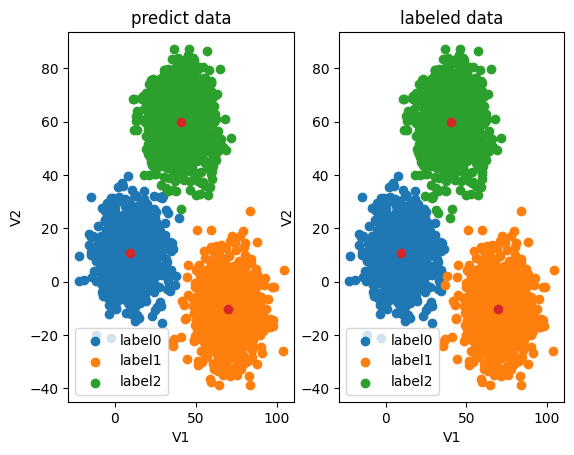

In [17]:
mask0 = y_corrected == 0
mask1 = y_corrected == 1
mask2 = y_corrected == 2

fig7 = plt.subplot(121)
plt.title("predict data")
label0 = plt.scatter(x.loc[:, 'V1'][mask0], x.loc[:, 'V2'][mask0])
label1 = plt.scatter(x.loc[:, 'V1'][mask1], x.loc[:, 'V2'][mask1])
label2 = plt.scatter(x.loc[:, 'V1'][mask2], x.loc[:, 'V2'][mask2])
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])

mask0 = y == 0
mask1 = y == 1
mask2 = y == 2
fig8 = plt.subplot(122)
plt.title("labeled data")
label0 = plt.scatter(x.loc[:, 'V1'][mask0], x.loc[:, 'V2'][mask0])
label1 = plt.scatter(x.loc[:, 'V1'][mask1], x.loc[:, 'V2'][mask1])
label2 = plt.scatter(x.loc[:, 'V1'][mask2], x.loc[:, 'V2'][mask2])
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2), ('label0', 'label1', 'label2'))
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()